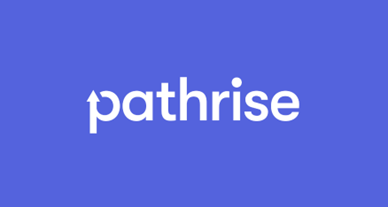

## Data Challenge Assignment¶ 

Pathrise is an online program that provides 1-on-1 mentorship, training, and advice to help job seekers get the best possible jobs in tech. Every two weeks, Pathrise welcomes a new cohort of fellows. If a candidate is interested in joining our program and successfully passes all stages of our admission process, they receive an offer to join Pathrise and become a fellow

On average, for fellows who stay with us after their free trial period, it takes about 4 months to receive a final job offer. However, there is a lot of variation in fellows’ outcomes. Being able to predict how fast every single fellow is going to find a job is crucial for our business. In this exercise we provide you with a sample of information we collected from our fellows from the moment they joined our program.

The main goal of your analysis is to derive insights around if a fellow will ultimately be placed at a company and how long until a placement can be expected.

## Objectives
Perform exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib

### Exploratory Data Analysis
### Preparing Data Feature Engineering

## Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

### Visualization libraries

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import matplotlib as style

## Read the Excel file

In [6]:
df=pd.read_excel("Data_Pathrise.xlsx")

In [7]:
df

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify


## Exploratory data analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [9]:
df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [10]:
df.columns

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')

In [11]:
df["id"]

0          1
1          2
2          3
3          4
4          5
        ... 
2539    2540
2540    2541
2541    2542
2542    2543
2543    2544
Name: id, Length: 2544, dtype: int64

In [12]:
set(df["id"])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [13]:
df["pathrise_status"]

0                   Active
1                   Active
2              Closed Lost
3              Closed Lost
4                   Placed
               ...        
2539    Withdrawn (Failed)
2540    Withdrawn (Failed)
2541                Active
2542                Active
2543             Withdrawn
Name: pathrise_status, Length: 2544, dtype: object

In [14]:
set(df["pathrise_status"])

{'Active',
 'Break',
 'Closed Lost',
 'Deferred',
 'MIA',
 'Placed',
 'Withdrawn',
 'Withdrawn (Failed)',
 'Withdrawn (Trial)'}

In [15]:
df["primary_track"]

0          SWE
1          PSO
2       Design
3          PSO
4          SWE
         ...  
2539    Design
2540      Data
2541       SWE
2542       SWE
2543       SWE
Name: primary_track, Length: 2544, dtype: object

In [16]:
set(df["primary_track"])

{'Data', 'Design', 'Marketing', 'PSO', 'SWE', 'Web'}

In [17]:
df["cohort_tag"]

0       OCT19A
1       JAN20A
2       AUG19B
3       AUG19B
4       AUG19A
         ...  
2539    JUN18A
2540    JAN19B
2541    SEP18C
2542    MAY18A
2543    OCT19A
Name: cohort_tag, Length: 2544, dtype: object

In [18]:
set(df["cohort_tag"])

{'APR18A',
 'APR18B',
 'APR19A',
 'APR19B',
 'APR20A',
 'AUG18A',
 'AUG19A',
 'AUG19B',
 'AUG19C',
 'DEC18A',
 'DEC19A',
 'FEB18A',
 'FEB19A',
 'FEB19B',
 'FEB20A',
 'FEB20B',
 'FEB20a',
 'JAN18A',
 'JAN19A',
 'JAN19B',
 'JAN20A',
 'JAN20B',
 'JUL19A',
 'JUL19B',
 'JUN18A',
 'JUN19A',
 'JUN19B',
 'MAR18A',
 'MAR19A',
 'MAR19B',
 'MAR20A',
 'MAY18A',
 'MAY19A',
 'MAY19B',
 'NOV18A',
 'NOV19A',
 'NOV19B',
 'OCT18A',
 'OCT18B',
 'OCT19A',
 'OCT19B',
 'OCT21A',
 'SEP18A',
 'SEP18B',
 'SEP18C',
 'SEP19A',
 'SEP19B',
 nan}

In [19]:
df["program_duration_days"]

0         NaN
1         NaN
2         0.0
3         0.0
4        89.0
        ...  
2539    457.0
2540    488.0
2541      NaN
2542      NaN
2543    285.0
Name: program_duration_days, Length: 2544, dtype: float64

In [20]:
set(df["program_duration_days"])

{nan,
 nan,
 0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 11.0,
 12.0,
 13.0,
 nan,
 nan,
 7.0,
 14.0,
 16.0,
 19.0,
 15.0,
 18.0,
 20.0,
 3.0,
 24.0,
 4.0,
 5.0,
 26.0,
 27.0,
 28.0,
 25.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 36.0,
 37.0,
 38.0,
 44.0,
 45.0,
 40.0,
 47.0,
 48.0,
 41.0,
 9.0,
 10.0,
 52.0,
 53.0,
 54.0,
 46.0,
 2.0,
 57.0,
 58.0,
 59.0,
 60.0,
 55.0,
 62.0,
 61.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 63.0,
 70.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 17.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 90.0,
 97.0,
 96.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 98.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 21.0,
 22.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 nan,
 nan,
 nan,
 nan,
 128.0,
 129.0,
 130.0,
 nan,
 125.0,
 124.0,
 132.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 131.0,
 141.0,
 142.0

In [21]:
df["placed"]

0       0
1       0
2       0
3       0
4       1
       ..
2539    0
2540    0
2541    0
2542    0
2543    0
Name: placed, Length: 2544, dtype: int64

In [22]:
set(df["placed"])

{0, 1}

In [23]:
df["employment_status "]

0               Unemployed
1               Unemployed
2       Employed Part-Time
3               Contractor
4               Unemployed
               ...        
2539            Contractor
2540                   NaN
2541            Contractor
2542                   NaN
2543               Student
Name: employment_status , Length: 2544, dtype: object

In [24]:
set(df["employment_status "])

{'Contractor',
 'Employed Full-Time',
 'Employed Part-Time',
 'Student',
 'Unemployed',
 nan}

In [25]:
df["highest_level_of_education"]

0             Bachelor's Degree
1       Some College, No Degree
2               Master's Degree
3             Bachelor's Degree
4             Bachelor's Degree
                 ...           
2539            Master's Degree
2540            Master's Degree
2541          Bachelor's Degree
2542            Master's Degree
2543            Master's Degree
Name: highest_level_of_education, Length: 2544, dtype: object

In [26]:
set(df["highest_level_of_education"])

{"Bachelor's Degree",
 'Doctorate or Professional Degree',
 'GED or equivalent',
 'High School Graduate',
 "Master's Degree",
 'Some College, No Degree',
 'Some High School',
 nan}

In [27]:
df["length_of_job_search"]

0                3-5 months
1                3-5 months
2       Less than one month
3       Less than one month
4                1-2 months
               ...         
2539     6 months to a year
2540             3-5 months
2541    Less than one month
2542    Less than one month
2543             1-2 months
Name: length_of_job_search, Length: 2544, dtype: object

In [28]:
set(df["length_of_job_search"])

{'1-2 months',
 '3-5 months',
 '6 months to a year',
 'Less than one month',
 'Over a year',
 nan}

In [29]:
df["biggest_challenge_in_search"]

0            Hearing back on my applications
1        Getting past final round interviews
2       Figuring out which jobs to apply for
3        Getting past final round interviews
4            Hearing back on my applications
                        ...                 
2539                  Technical interviewing
2540         Hearing back on my applications
2541                  Technical interviewing
2542                  Technical interviewing
2543         Hearing back on my applications
Name: biggest_challenge_in_search, Length: 2544, dtype: object

In [30]:
set(df["biggest_challenge_in_search"])

{'Behavioral interviewing',
 'Figuring out which jobs to apply for',
 'Getting past final round interviews',
 'Getting past mid-stage interviews',
 'Getting past phone screens',
 'Hearing back on my applications',
 'Lack of relevant experience',
 'Resume gap',
 'Technical interviewing',
 'Technical skills',
 nan}

In [31]:
df["professional_experience"]

0                3-4 years
1                1-2 years
2       Less than one year
3       Less than one year
4                1-2 years
               ...        
2539              5+ years
2540             1-2 years
2541             1-2 years
2542             1-2 years
2543             1-2 years
Name: professional_experience, Length: 2544, dtype: object

In [32]:
set(df["professional_experience"])

{'1-2 years', '3-4 years', '5+ years', 'Less than one year', nan}

In [33]:
df["work_authorization_status"]

0       Canada Citizen
1              Citizen
2              Citizen
3              Citizen
4          F1 Visa/OPT
             ...      
2539           Citizen
2540       F1 Visa/OPT
2541           Citizen
2542           Citizen
2543        Green Card
Name: work_authorization_status, Length: 2544, dtype: object

In [34]:
set(df["work_authorization_status"])

{'Canada Citizen',
 'Citizen',
 'F1 Visa/CPT',
 'F1 Visa/OPT',
 'Green Card',
 'H1B',
 'Not Authorized',
 'Other',
 'STEM OPT',
 nan}

In [35]:
df["number_of_interviews"]

0        2.0
1        6.0
2        0.0
3        5.0
4       10.0
        ... 
2539     4.0
2540     1.0
2541     1.0
2542     2.0
2543     3.0
Name: number_of_interviews, Length: 2544, dtype: float64

In [36]:
set(df["number_of_interviews"])

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 nan,
 nan,
 nan,
 10.0,
 nan,
 7.0,
 nan,
 nan,
 nan,
 8.0,
 9.0,
 11.0,
 12.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 13.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

In [37]:
df["number_of_applications"]

0       900
1         0
2         0
3        25
4       100
       ... 
2539     15
2540      7
2541     30
2542     10
2543     70
Name: number_of_applications, Length: 2544, dtype: int64

In [38]:
set(df["number_of_applications"])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 300,
 350,
 400,
 500,
 800,
 900,
 1000}

In [39]:
df["gender"]

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
2539      Male
2540      Male
2541    Female
2542      Male
2543      Male
Name: gender, Length: 2544, dtype: object

In [40]:
set(df["gender"])

{'Decline to Self Identify', 'Female', 'Male', 'Non-Binary', nan}

In [41]:
df["race"]

0       Non-Hispanic White or Euro-American
1       Non-Hispanic White or Euro-American
2              East Asian or Asian American
3                  Decline to Self Identify
4              East Asian or Asian American
                       ...                 
2539    Non-Hispanic White or Euro-American
2540    Non-Hispanic White or Euro-American
2541    Non-Hispanic White or Euro-American
2542               Decline to Self Identify
2543    Non-Hispanic White or Euro-American
Name: race, Length: 2544, dtype: object

In [42]:
set(df["race"])

{'Black, Afro-Caribbean, or African American',
 'Decline to Self Identify',
 'East Asian or Asian American',
 'Latino or Hispanic American',
 'Middle Eastern or Arab American',
 'Native American or Alaskan Native',
 'Non-Hispanic White or Euro-American',
 'South Asian or Indian American',
 'Two or More Races',
 nan}

## Data Visualization¶

### To check the dataset balance

<AxesSubplot: xlabel='placed', ylabel='count'>

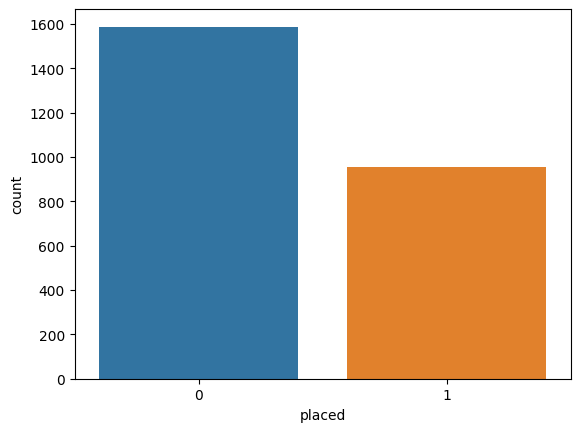

In [43]:
sns.countplot(x="placed",data=df)




### number_of_interviews VS program_duration_days variables would affect the Placed.


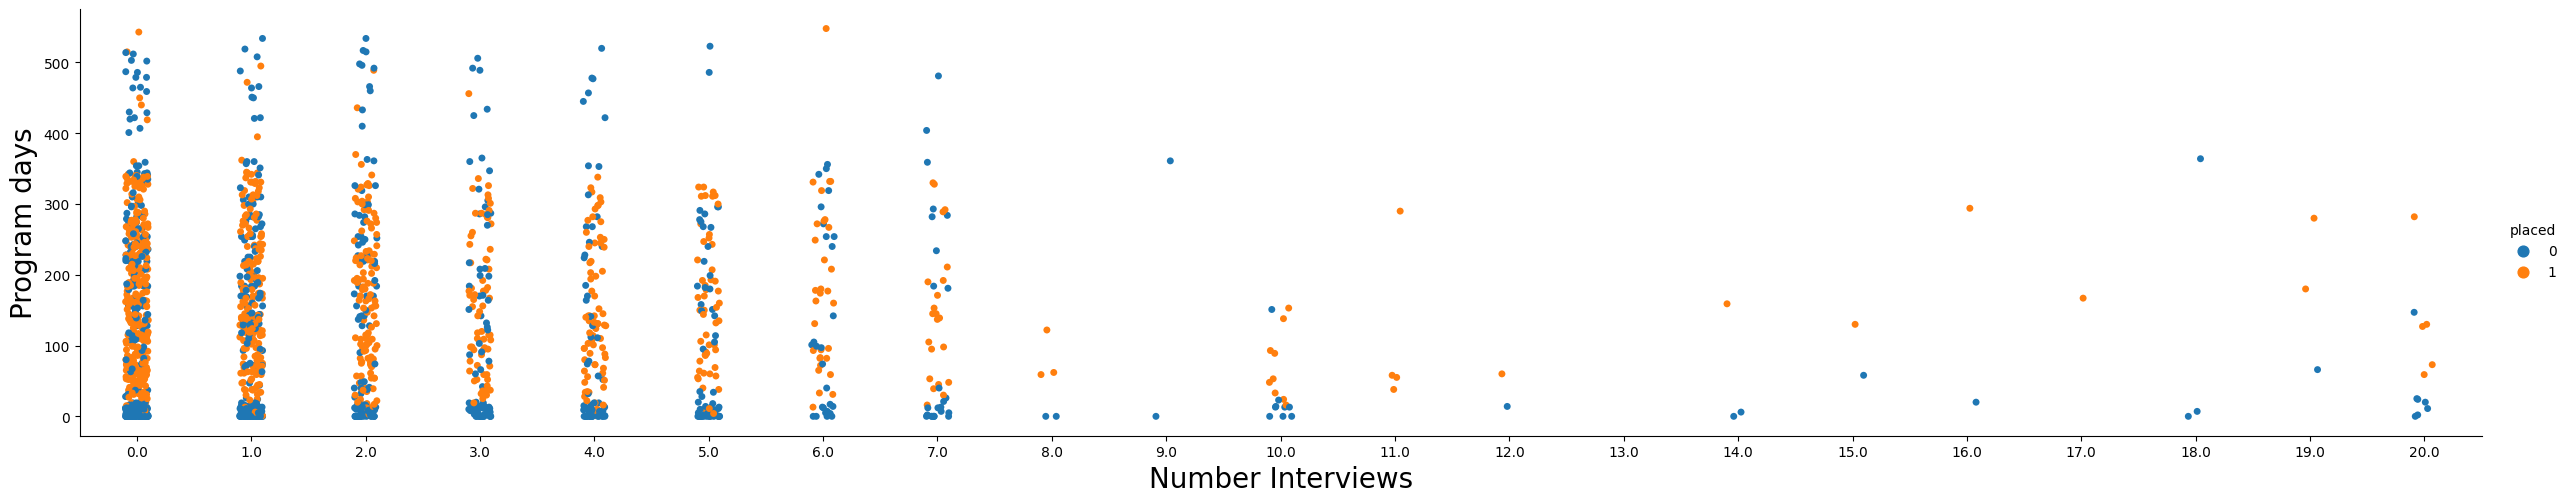

In [44]:
sns.catplot(x="number_of_interviews", y="program_duration_days", hue="placed", data=df, aspect=5)
plt.xlabel("Number Interviews",fontsize=20)
plt.ylabel("Program days",fontsize=20)
plt.show()

### A countplot is a type of chart used to visualize the distribution of categorical data. It displays the number of occurrences of each category as bars, with the categories listed along the x-axis and the count of occurrences represented by the height of the bars along the y-axis. Countplots are a useful tool for analyzing and understanding categorical data in a clear and concise manner, and are commonly used in data science, statistics, and other fields.

### Number of pathrise_status

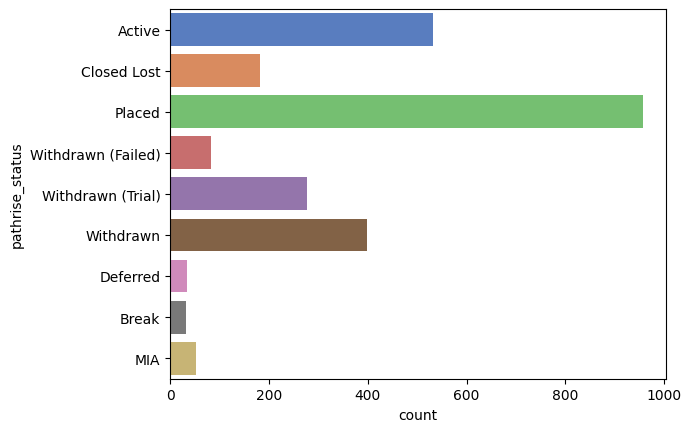

In [45]:
sns.countplot(data=df,y="pathrise_status",palette="muted")
plt.show()

### Number of primary_track

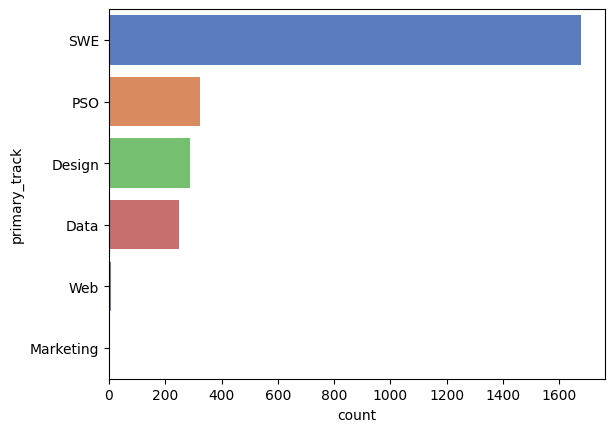

In [46]:
sns.countplot(data=df,y="primary_track",palette="muted")
plt.show()

### Number of cohort_tag

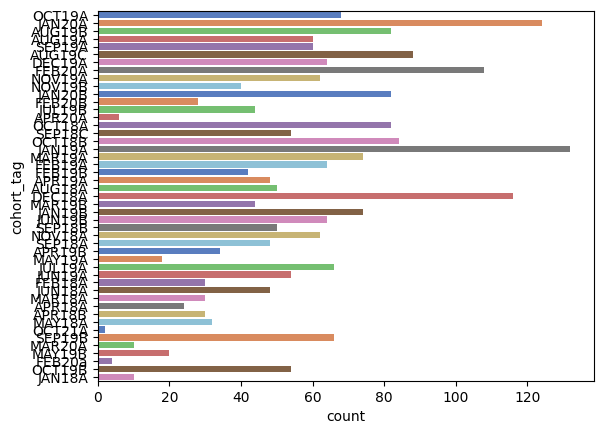

In [47]:
sns.countplot(data=df,y="cohort_tag",palette="muted")
plt.show()

### Number of placed

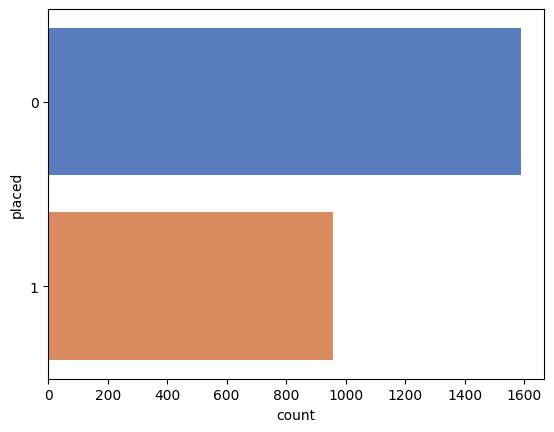

In [48]:
sns.countplot(data=df,y="placed",palette="muted")
plt.show()

### Number of employment_status

### It makes sense,Students and unemployed people are more willing to participate in the program

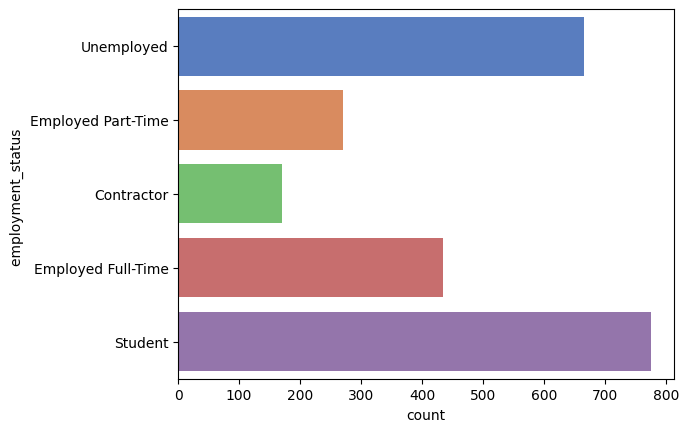

In [49]:
sns.countplot(data=df,y="employment_status ",palette="muted")
plt.show()

### Number of highest_level_of_education

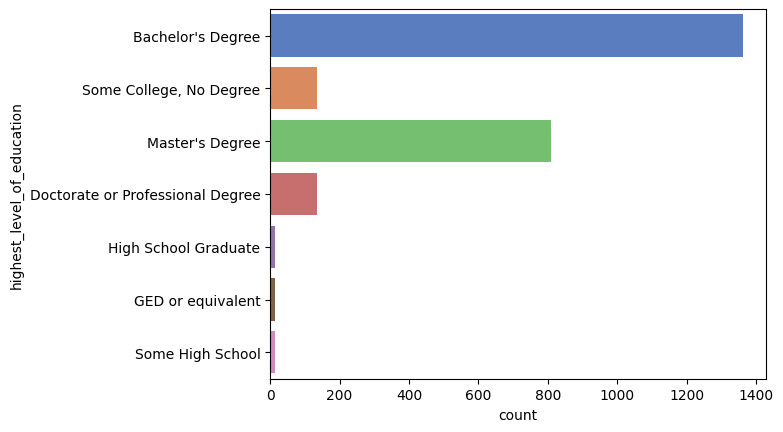

In [50]:
sns.countplot(data=df,y="highest_level_of_education",palette="muted")
plt.show()

### Number of length_of_job_search

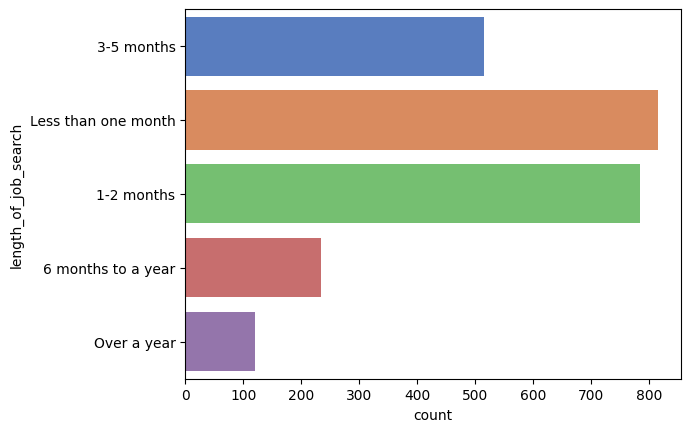

In [51]:
sns.countplot(data=df,y="length_of_job_search",palette="muted")
plt.show()

### Number of biggest_challenge_in_search

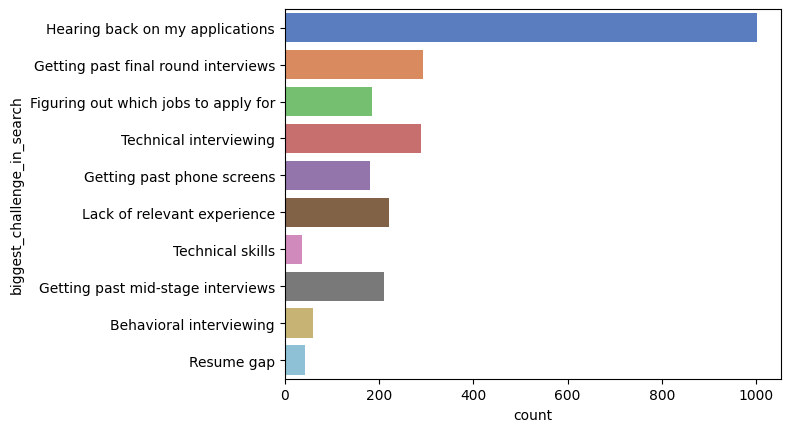

In [52]:
sns.countplot(data=df,y="biggest_challenge_in_search",palette="muted")
plt.show()

### Number of professional_experience

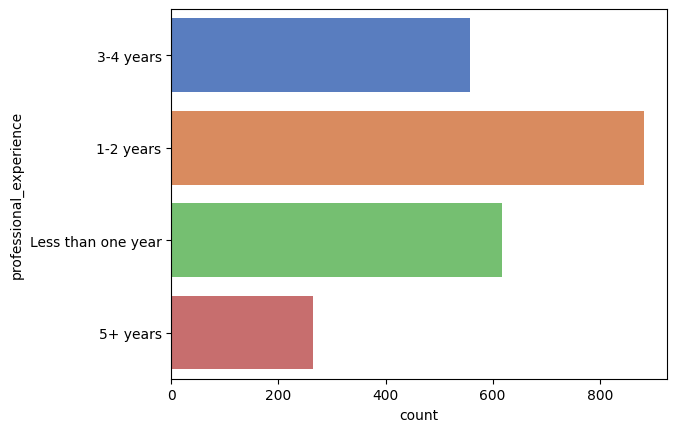

In [53]:
sns.countplot(data=df,y="professional_experience",palette="muted")
plt.show()

### Number of work_authorization_status

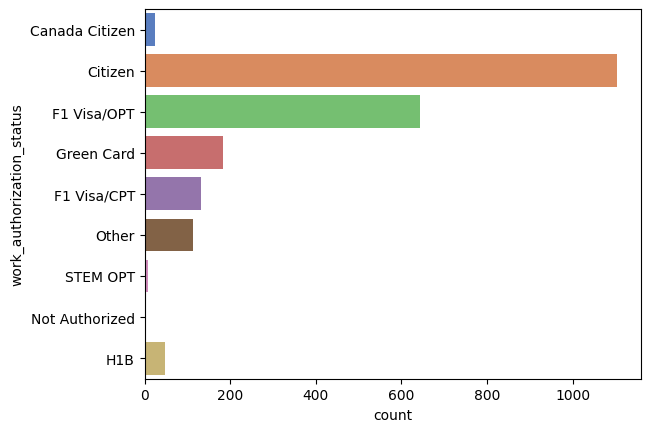

In [54]:
sns.countplot(data=df,y="work_authorization_status",palette="muted")
plt.show()

### Number of number_of_interviews

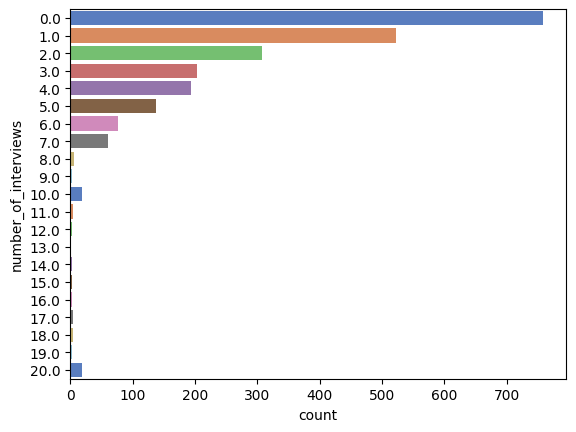

In [55]:
sns.countplot(data=df,y="number_of_interviews",palette="muted")
plt.show()

### Number of number_of_applications

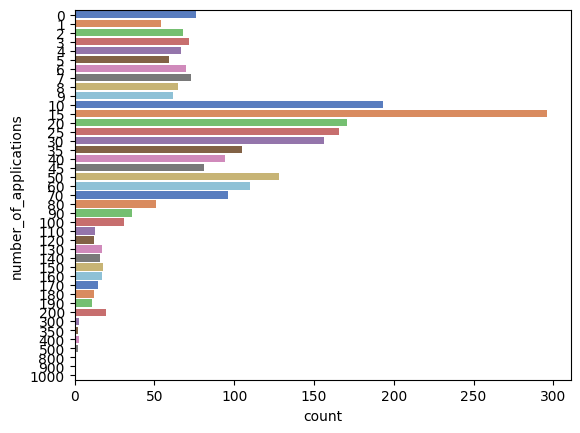

In [56]:
sns.countplot(data=df,y="number_of_applications",palette="muted")
plt.show()

### Number of gender

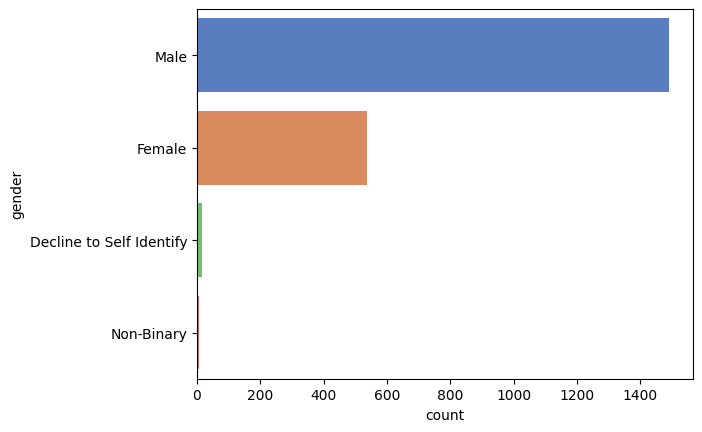

In [57]:
sns.countplot(data=df,y="gender",palette="muted")
plt.show()

### Number of race

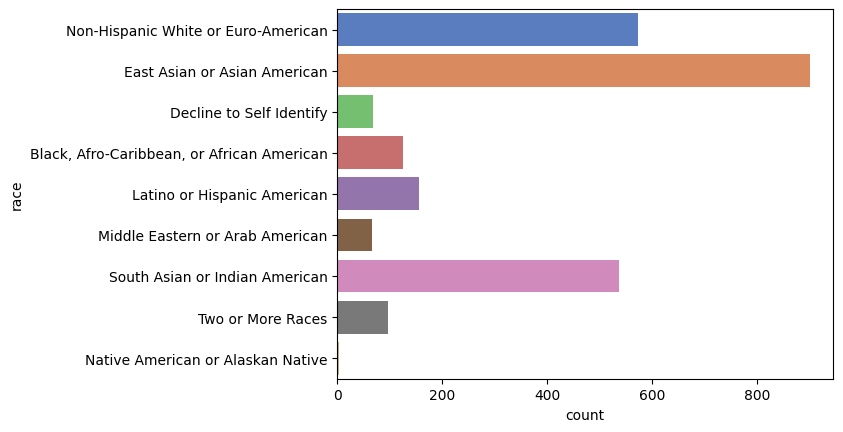

In [58]:
sns.countplot(data=df,y="race",palette="muted")
plt.show()

### A boxplot, also known as a box-and-whisker plot, is a type of chart used to display the distribution of numerical data through their quartiles.

## Box plot

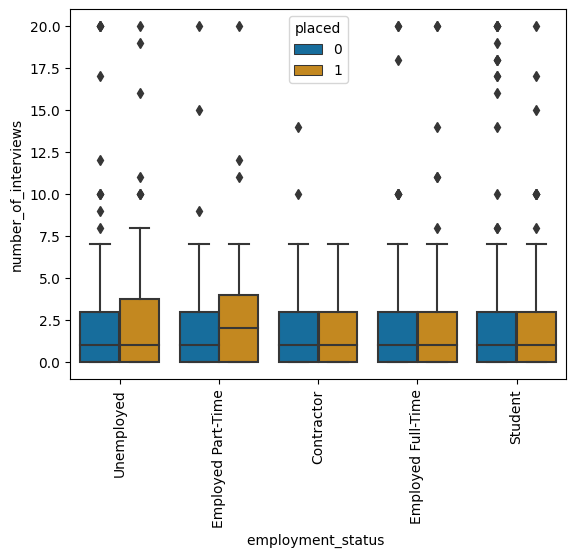

In [59]:
sns.boxplot(data=df, x="employment_status ", y="number_of_interviews",hue="placed",palette="colorblind")
plt.xticks(rotation=90)
plt.show()

## Pair plot

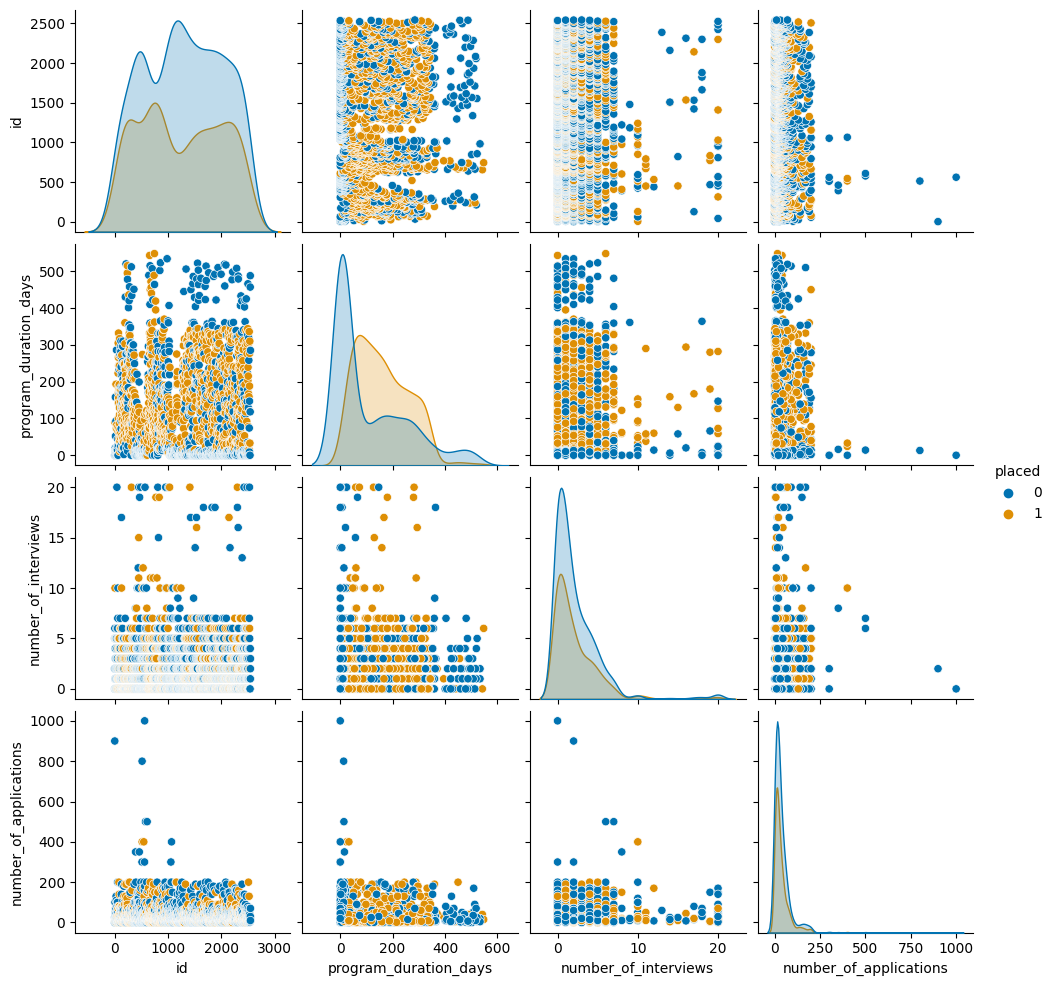

In [60]:
sns.pairplot(data=df, hue='placed', palette='colorblind')
plt.show()

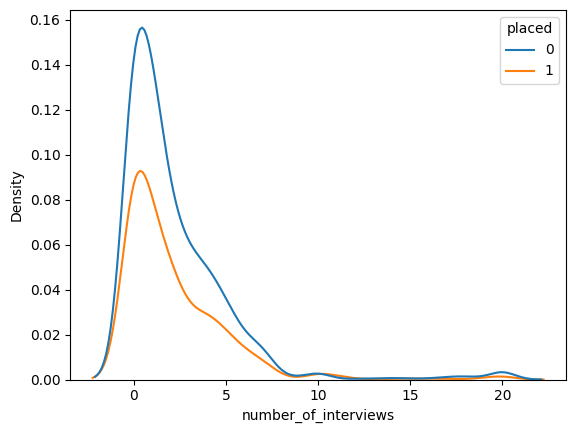

In [61]:
sns.kdeplot(data=df,x="number_of_interviews",hue="placed")
plt.show()

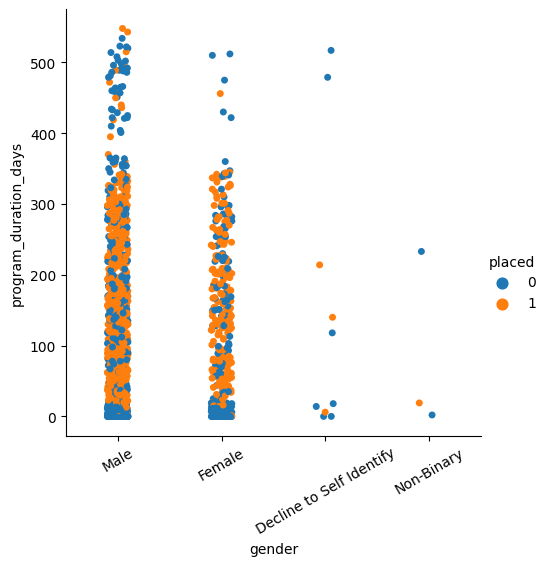

In [62]:
sns.catplot(data=df,x="gender", y="program_duration_days",hue="placed")
plt.xticks(rotation=30)
plt.show()

## Data Cleaning

In [63]:
data_missing=pd.read_excel("Data_Pathrise.xlsx")
data_missing

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify


In [64]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

### I delete the columns that do not affect the result

In [65]:
data_missing.drop("id",axis=1,inplace=True)
data_missing.head()

,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [66]:
data_missing.drop("pathrise_status",axis=1,inplace=True)
data_missing.head()

,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [67]:
data_missing.drop("cohort_tag",axis=1,inplace=True)
data_missing.head()

,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,SWE,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,PSO,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,Design,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,PSO,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,SWE,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [68]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                2544 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       2544 non-null   int64  
 3   employment_status            2315 non-null   object 
 4   highest_level_of_education   2486 non-null   object 
 5   length_of_job_search         2470 non-null   object 
 6   biggest_challenge_in_search  2520 non-null   object 
 7   professional_experience      2322 non-null   object 
 8   work_authorization_status    2260 non-null   object 
 9   number_of_interviews         2326 non-null   float64
 10  number_of_applications       2544 non-null   int64  
 11  gender                       2052 non-null   object 
 12  race                         2526 non-null   object 
dtypes: float64(2), int

In [69]:
data_missing.drop("number_of_interviews",axis=1,inplace=True)
data_missing.head()

,primary_track,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_applications,gender,race
0,SWE,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,900,Male,Non-Hispanic White or Euro-American
1,PSO,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,0,Male,Non-Hispanic White or Euro-American
2,Design,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0,Male,East Asian or Asian American
3,PSO,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,25,Male,Decline to Self Identify
4,SWE,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,100,Male,East Asian or Asian American


In [70]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                2544 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       2544 non-null   int64  
 3   employment_status            2315 non-null   object 
 4   highest_level_of_education   2486 non-null   object 
 5   length_of_job_search         2470 non-null   object 
 6   biggest_challenge_in_search  2520 non-null   object 
 7   professional_experience      2322 non-null   object 
 8   work_authorization_status    2260 non-null   object 
 9   number_of_applications       2544 non-null   int64  
 10  gender                       2052 non-null   object 
 11  race                         2526 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 238.6+ KB


In [71]:
data_missing.isnull().sum()

primary_track                    0
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_applications           0
gender                         492
race                            18
dtype: int64

### Replace it by frequency

In [72]:
data_missing["employment_status "].value_counts()

Student               775
Unemployed            665
Employed Full-Time    435
Employed Part-Time    270
Contractor            170
Name: employment_status , dtype: int64

In [73]:
data_missing["employment_status "]=data_missing["employment_status "].replace(np.nan,"Student")

In [74]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                2544 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       2544 non-null   int64  
 3   employment_status            2544 non-null   object 
 4   highest_level_of_education   2486 non-null   object 
 5   length_of_job_search         2470 non-null   object 
 6   biggest_challenge_in_search  2520 non-null   object 
 7   professional_experience      2322 non-null   object 
 8   work_authorization_status    2260 non-null   object 
 9   number_of_applications       2544 non-null   int64  
 10  gender                       2052 non-null   object 
 11  race                         2526 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 238.6+ KB


In [75]:
data_missing["highest_level_of_education"].value_counts()

Bachelor's Degree                   1361
Master's Degree                      810
Some College, No Degree              135
Doctorate or Professional Degree     135
High School Graduate                  15
GED or equivalent                     15
Some High School                      15
Name: highest_level_of_education, dtype: int64

In [76]:
data_missing["highest_level_of_education"]=data_missing["highest_level_of_education"].replace(np.nan,"Bachelor's Degree")

In [77]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                2544 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       2544 non-null   int64  
 3   employment_status            2544 non-null   object 
 4   highest_level_of_education   2544 non-null   object 
 5   length_of_job_search         2470 non-null   object 
 6   biggest_challenge_in_search  2520 non-null   object 
 7   professional_experience      2322 non-null   object 
 8   work_authorization_status    2260 non-null   object 
 9   number_of_applications       2544 non-null   int64  
 10  gender                       2052 non-null   object 
 11  race                         2526 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 238.6+ KB


In [78]:
data_missing["length_of_job_search"].value_counts()

Less than one month    815
1-2 months             785
3-5 months             515
6 months to a year     235
Over a year            120
Name: length_of_job_search, dtype: int64

In [79]:
data_missing["length_of_job_search"]=data_missing["length_of_job_search"].replace(np.nan,"Less than one month")

In [80]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                2544 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       2544 non-null   int64  
 3   employment_status            2544 non-null   object 
 4   highest_level_of_education   2544 non-null   object 
 5   length_of_job_search         2544 non-null   object 
 6   biggest_challenge_in_search  2520 non-null   object 
 7   professional_experience      2322 non-null   object 
 8   work_authorization_status    2260 non-null   object 
 9   number_of_applications       2544 non-null   int64  
 10  gender                       2052 non-null   object 
 11  race                         2526 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 238.6+ KB


In [81]:
data_missing["biggest_challenge_in_search"].value_counts()

Hearing back on my applications         1002
Getting past final round interviews      294
Technical interviewing                   288
Lack of relevant experience              222
Getting past mid-stage interviews        210
Figuring out which jobs to apply for     186
Getting past phone screens               180
Behavioral interviewing                   60
Resume gap                                42
Technical skills                          36
Name: biggest_challenge_in_search, dtype: int64

In [82]:
data_missing["biggest_challenge_in_search"]=data_missing["biggest_challenge_in_search"].replace(np.nan,"Hearing back on my applications")

In [83]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                2544 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       2544 non-null   int64  
 3   employment_status            2544 non-null   object 
 4   highest_level_of_education   2544 non-null   object 
 5   length_of_job_search         2544 non-null   object 
 6   biggest_challenge_in_search  2544 non-null   object 
 7   professional_experience      2322 non-null   object 
 8   work_authorization_status    2260 non-null   object 
 9   number_of_applications       2544 non-null   int64  
 10  gender                       2052 non-null   object 
 11  race                         2526 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 238.6+ KB


In [84]:
data_missing["professional_experience"].value_counts()

1-2 years             882
Less than one year    618
3-4 years             558
5+ years              264
Name: professional_experience, dtype: int64

In [85]:
data_missing["professional_experience"]=data_missing["professional_experience"].replace(np.nan,"1-2 years")

In [86]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                2544 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       2544 non-null   int64  
 3   employment_status            2544 non-null   object 
 4   highest_level_of_education   2544 non-null   object 
 5   length_of_job_search         2544 non-null   object 
 6   biggest_challenge_in_search  2544 non-null   object 
 7   professional_experience      2544 non-null   object 
 8   work_authorization_status    2260 non-null   object 
 9   number_of_applications       2544 non-null   int64  
 10  gender                       2052 non-null   object 
 11  race                         2526 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 238.6+ KB


In [87]:
data_missing["work_authorization_status"].value_counts()

Citizen           1104
F1 Visa/OPT        644
Green Card         184
F1 Visa/CPT        132
Other              112
H1B                 48
Canada Citizen      24
STEM OPT             8
Not Authorized       4
Name: work_authorization_status, dtype: int64

In [88]:
data_missing["work_authorization_status"]=data_missing["work_authorization_status"].replace(np.nan,"Citizen")

In [89]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                2544 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       2544 non-null   int64  
 3   employment_status            2544 non-null   object 
 4   highest_level_of_education   2544 non-null   object 
 5   length_of_job_search         2544 non-null   object 
 6   biggest_challenge_in_search  2544 non-null   object 
 7   professional_experience      2544 non-null   object 
 8   work_authorization_status    2544 non-null   object 
 9   number_of_applications       2544 non-null   int64  
 10  gender                       2052 non-null   object 
 11  race                         2526 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 238.6+ KB


In [90]:
data_missing["gender"].value_counts()

Male                        1492
Female                       538
Decline to Self Identify      16
Non-Binary                     6
Name: gender, dtype: int64

In [91]:
data_missing["gender"]=data_missing["gender"].replace(np.nan,"Male")

In [92]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                2544 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       2544 non-null   int64  
 3   employment_status            2544 non-null   object 
 4   highest_level_of_education   2544 non-null   object 
 5   length_of_job_search         2544 non-null   object 
 6   biggest_challenge_in_search  2544 non-null   object 
 7   professional_experience      2544 non-null   object 
 8   work_authorization_status    2544 non-null   object 
 9   number_of_applications       2544 non-null   int64  
 10  gender                       2544 non-null   object 
 11  race                         2526 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 238.6+ KB


In [93]:
data_missing["race"].value_counts()

East Asian or Asian American                  900
Non-Hispanic White or Euro-American           573
South Asian or Indian American                537
Latino or Hispanic American                   156
Black, Afro-Caribbean, or African American    126
Two or More Races                              96
Decline to Self Identify                       69
Middle Eastern or Arab American                66
Native American or Alaskan Native               3
Name: race, dtype: int64

In [94]:
data_missing["race"]=data_missing["race"].replace(np.nan,"East Asian or Asian American")

In [95]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                2544 non-null   object 
 1   program_duration_days        1928 non-null   float64
 2   placed                       2544 non-null   int64  
 3   employment_status            2544 non-null   object 
 4   highest_level_of_education   2544 non-null   object 
 5   length_of_job_search         2544 non-null   object 
 6   biggest_challenge_in_search  2544 non-null   object 
 7   professional_experience      2544 non-null   object 
 8   work_authorization_status    2544 non-null   object 
 9   number_of_applications       2544 non-null   int64  
 10  gender                       2544 non-null   object 
 11  race                         2544 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 238.6+ KB


## Create dummy variables to categorical columns¶

### Use the function get_dummies and features dataframe to apply OneHotEncoder to all odject columns. Assign the value to the variable df_dummy, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [96]:
data_missing_dummy=pd.get_dummies(data_missing[["primary_track","employment_status ","highest_level_of_education",
                                                "length_of_job_search","biggest_challenge_in_search","professional_experience",
                                                "work_authorization_status","gender","race"]])

In [97]:
data_missing_dummy

,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,employment_status _Employed Full-Time,employment_status _Employed Part-Time,employment_status _Student,...,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2540,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2541,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2542,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [98]:
data_missing=data_missing.drop(["primary_track","employment_status ","highest_level_of_education",
                                                "length_of_job_search","biggest_challenge_in_search","professional_experience",
                                                "work_authorization_status","gender","race"],axis=1)

In [99]:
data_missing=pd.concat([data_missing,data_missing_dummy],axis=1)

In [100]:
data_missing

,program_duration_days,placed,number_of_applications,primary_track_Data,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Contractor,...,gender_Non-Binary,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,NaN,0,900,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,NaN,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.0,0,25,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,89.0,1,100,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,457.0,0,15,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2540,488.0,0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2541,NaN,0,30,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2542,NaN,0,10,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [101]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 62 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             1928 non-null   float64
 1   placed                                                            2544 non-null   int64  
 2   number_of_applications                                            2544 non-null   int64  
 3   primary_track_Data                                                2544 non-null   uint8  
 4   primary_track_Design                                              2544 non-null   uint8  
 5   primary_track_Marketing                                           2544 non-null   uint8  
 6   primary_track_PSO                                                 2544 non-null   uint8  
 7   primary_track_SWE                

## Cast all numeric columns to float64

### Now that our df dataframe only contains numbers cast the entire dataframe to variable type float64

In [102]:
data_missing=data_missing.astype(float)

In [103]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 62 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             1928 non-null   float64
 1   placed                                                            2544 non-null   float64
 2   number_of_applications                                            2544 non-null   float64
 3   primary_track_Data                                                2544 non-null   float64
 4   primary_track_Design                                              2544 non-null   float64
 5   primary_track_Marketing                                           2544 non-null   float64
 6   primary_track_PSO                                                 2544 non-null   float64
 7   primary_track_SWE                

## We can now export it to a CSV for the next section

In [104]:
data_missing.to_csv("preprocessed.csv")